<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization**


Estimated time needed: **45** minutes


In this lab, you will focus on data visualization. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


After completing this lab, you will be able to:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition and comparison of data.




## Demo: How to work with database


Download the database file.


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

**Install and Import Necessary Python Libraries**

Ensure that you have the required libraries installed to work with SQLite and Pandas:


In [73]:
!pip install pandas 
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

**Read the CSV File into a Pandas DataFrame**

Load the Stack Overflow survey data into a Pandas DataFrame:


In [74]:
# Read the CSV file
df = pd.read_csv('survey-data.csv')

# Display the first few rows of the data
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


**Create a SQLite Database and Insert the Data**

Now, let's create a new SQLite database (`survey-data.sqlite`) and insert the data from the DataFrame into a table using the sqlite3 library:


In [ ]:
import sqlite3

# Create a connection to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Write the dataframe to the SQLite database
df.to_sql('main', conn, if_exists='replace', index=False)


# Close the connection
conn.close()


**Verify the Data in the SQLite Database**
Verify that the data has been correctly inserted into the SQLite database by running a simple query:


In [ ]:
# Reconnect to the SQLite database
conn = sqlite3.connect('survey-data.sqlite')

# Run a simple query to check the data
QUERY = "SELECT * FROM main LIMIT 5"
df_check = pd.read_sql_query(QUERY, conn)

# Display the results
print(df_check)


## Demo: Running an SQL Query


Count the number of rows in the table named 'main'


In [6]:
QUERY = """
SELECT COUNT(*) 
FROM main
"""
df = pd.read_sql_query(QUERY, conn)
df.head()


,COUNT(*)
0,65437


## Demo: Listing All Tables


To view the names of all tables in the database:


In [16]:
QUERY = """
SELECT name as Table_Name FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


## Demo: Running a Group By Query
    
For example, you can group data by a specific column, like Age, to get the count of respondents in each age group:


In [9]:
QUERY = """
SELECT Age, COUNT(*) as count
FROM main
GROUP BY Age
ORDER BY Age
"""
pd.read_sql_query(QUERY, conn)


,Age,count
0,18-24 years old,14098
1,25-34 years old,23911
2,35-44 years old,14942
3,45-54 years old,6249
4,55-64 years old,2575
5,65 years or older,772
6,Prefer not to say,322
7,Under 18 years old,2568


## Demo: Describing a table

Use this query to get the schema of a specific table, main in this case:


In [10]:
table_name = 'main'

QUERY = """
SELECT sql FROM sqlite_master 
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY, conn)
print(df.iat[0,0])


CREATE TABLE "main" (
"ResponseId" INTEGER,
  "MainBranch" TEXT,
  "Age" TEXT,
  "Employment" TEXT,
  "RemoteWork" TEXT,
  "Check" TEXT,
  "CodingActivities" TEXT,
  "EdLevel" TEXT,
  "LearnCode" TEXT,
  "LearnCodeOnline" TEXT,
  "TechDoc" TEXT,
  "YearsCode" TEXT,
  "YearsCodePro" TEXT,
  "DevType" TEXT,
  "OrgSize" TEXT,
  "PurchaseInfluence" TEXT,
  "BuyNewTool" TEXT,
  "BuildvsBuy" TEXT,
  "TechEndorse" TEXT,
  "Country" TEXT,
  "Currency" TEXT,
  "CompTotal" REAL,
  "LanguageHaveWorkedWith" TEXT,
  "LanguageWantToWorkWith" TEXT,
  "LanguageAdmired" TEXT,
  "DatabaseHaveWorkedWith" TEXT,
  "DatabaseWantToWorkWith" TEXT,
  "DatabaseAdmired" TEXT,
  "PlatformHaveWorkedWith" TEXT,
  "PlatformWantToWorkWith" TEXT,
  "PlatformAdmired" TEXT,
  "WebframeHaveWorkedWith" TEXT,
  "WebframeWantToWorkWith" TEXT,
  "WebframeAdmired" TEXT,
  "EmbeddedHaveWorkedWith" TEXT,
  "EmbeddedWantToWorkWith" TEXT,
  "EmbeddedAdmired" TEXT,
  "MiscTechHaveWorkedWith" TEXT,
  "MiscTechWantToWorkWith" TEXT,


## Hands-on Lab


### Visualizing the Distribution of Data

**Histograms**

Plot a histogram of CompTotal (Total Compensation).


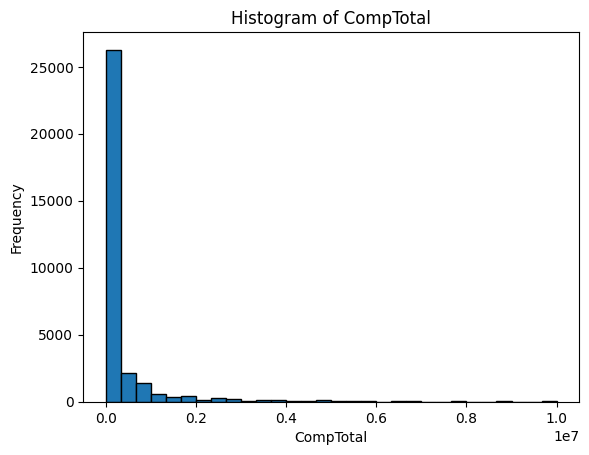

In [30]:
QUERY = "SELECT CompTotal FROM main"
df = pd.read_sql_query(QUERY, conn)

df = df.dropna(subset=['CompTotal'])

df = df[df['CompTotal'] <= 1e7]

df = df[df['CompTotal'] > 0]

plt.hist(df['CompTotal'], bins=30, edgecolor='black')
plt.title('Histogram of CompTotal')
plt.xlabel('CompTotal')
plt.ylabel('Frequency')
plt.show()

**Box Plots**

Plot a box plot of Age.


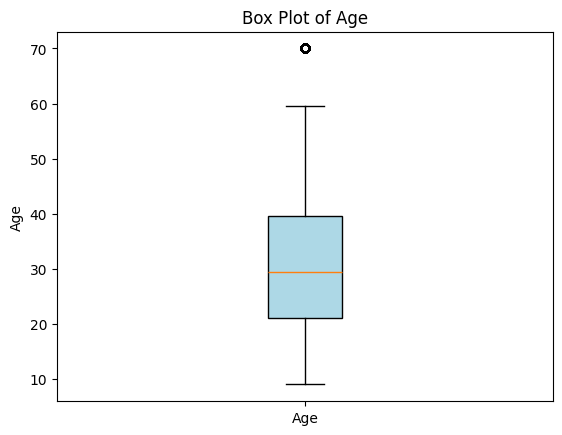

In [38]:
QUERY = "SELECT Age FROM main"
df = pd.read_sql_query(QUERY, conn)

def age_to_numeric(age_range):
    if age_range == 'Under 18 years old':
        return 9
    elif age_range == '18-24 years old':
        return 21
    elif age_range == '25-34 years old':
        return 29.5
    elif age_range == '35-44 years old':
        return 39.5
    elif age_range == '45-54 years old':
        return 49.5
    elif age_range == '55-64 years old':
        return 59.5
    elif age_range == '65 years or older':
        return 70
    elif age_range == 'Prefer not to say':
        return None
    else:
        return None

df['Age_numeric'] = df['Age'].apply(age_to_numeric)

df = df.dropna(subset=['Age_numeric'])

plt.boxplot(df['Age_numeric'], patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age')
plt.ylabel('Age')
plt.xticks([1], ['Age'])
plt.show()

### Visualizing Relationships in Data

**Scatter Plots**

Create a scatter plot of Age and WorkExp.


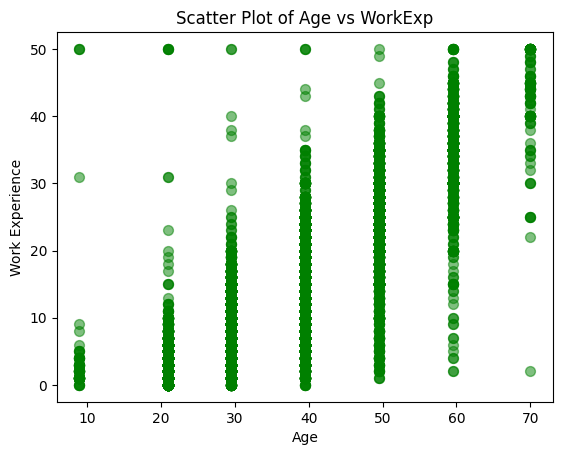

In [44]:
QUERY = "SELECT Age, WorkExp FROM main"
df = pd.read_sql_query(QUERY, conn)

def age_to_numeric(age_range):
    if age_range == 'Under 18 years old':
        return 9
    elif age_range == '18-24 years old':
        return 21
    elif age_range == '25-34 years old':
        return 29.5
    elif age_range == '35-44 years old':
        return 39.5
    elif age_range == '45-54 years old':
        return 49.5
    elif age_range == '55-64 years old':
        return 59.5
    elif age_range == '65 years or older':
        return 70
    elif age_range == 'Prefer not to say':
        return None
    else:
        return None

df['Age_numeric'] = df['Age'].apply(age_to_numeric)

df = df.dropna(subset=['Age_numeric', 'WorkExp'])

plt.scatter(df['Age_numeric'], df['WorkExp'], alpha=0.5, color='green', s=50)
plt.title('Scatter Plot of Age vs WorkExp')
plt.xlabel('Age')
plt.ylabel('Work Experience')
plt.show()

**Bubble Plots**

Create a bubble plot of `TimeSearching` and `Frustration` using the Age column as the bubble size.


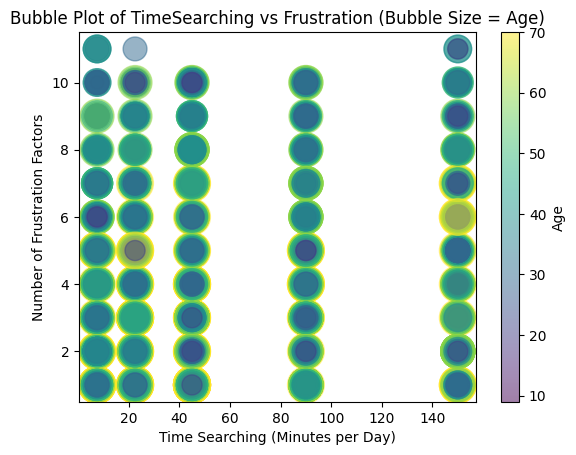

In [49]:
QUERY = "SELECT TimeSearching, Frustration, Age FROM main"
df = pd.read_sql_query(QUERY, conn)

def age_to_numeric(age_range):
    if age_range == 'Under 18 years old':
        return 9
    elif age_range == '18-24 years old':
        return 21
    elif age_range == '25-34 years old':
        return 29.5
    elif age_range == '35-44 years old':
        return 39.5
    elif age_range == '45-54 years old':
        return 49.5
    elif age_range == '55-64 years old':
        return 59.5
    elif age_range == '65 years or older':
        return 70
    elif age_range == 'Prefer not to say':
        return None
    else:
        return None
df['Age_numeric'] = df['Age'].apply(age_to_numeric)

def time_to_numeric(time_range):
    if time_range == 'Less than 15 minutes a day':
        return 7.5
    elif time_range == '15-30 minutes a day':
        return 22.5
    elif time_range == '30-60 minutes a day':
        return 45
    elif time_range == '60-120 minutes a day':
        return 90
    elif time_range == 'Over 120 minutes a day':
        return 150
    else:
        return None
df['TimeSearching_numeric'] = df['TimeSearching'].apply(time_to_numeric)

df['Frustration_count'] = df['Frustration'].apply(lambda x: len(str(x).split(';')))

df = df.dropna(subset=['Age_numeric', 'TimeSearching_numeric', 'Frustration_count'])

bubble_size = df['Age_numeric'] * 10

plt.scatter(
    df['TimeSearching_numeric'],  
    df['Frustration_count'],     
    s=bubble_size,               
    alpha=0.5,                    
    c=df['Age_numeric'],          
    cmap='viridis'                
)

plt.title('Bubble Plot of TimeSearching vs Frustration (Bubble Size = Age)')
plt.xlabel('Time Searching (Minutes per Day)')
plt.ylabel('Number of Frustration Factors')
plt.colorbar(label='Age')  
plt.show()

### Visualizing Composition of Data

**Pie Charts**

Create a pie chart of the top 5 databases(`DatabaseWantToWorkWith`) that respondents wish to learn next year.


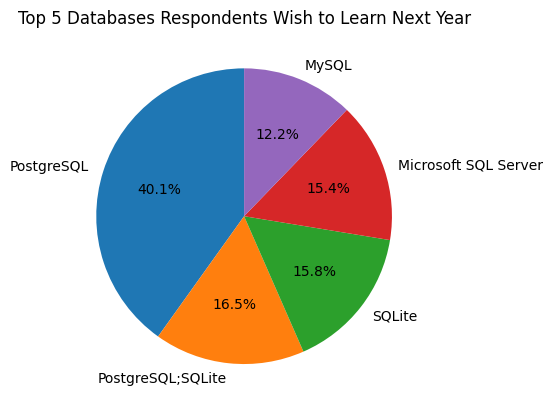

In [52]:
QUERY = """
SELECT DatabaseWantToWorkWith, COUNT(*) as count 
FROM main 
WHERE DatabaseWantToWorkWith IS NOT NULL 
GROUP BY DatabaseWantToWorkWith 
ORDER BY count DESC 
LIMIT 5
"""
df = pd.read_sql_query(QUERY, conn)

plt.pie(df['count'], labels=df['DatabaseWantToWorkWith'], autopct='%1.1f%%', startangle=90)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.show()

In [62]:
import warnings
warnings.filterwarnings("ignore")

**Stacked Charts** 

Create a stacked bar chart of median `TimeSearching` and `TimeAnswering` for the age group 30 to 35.


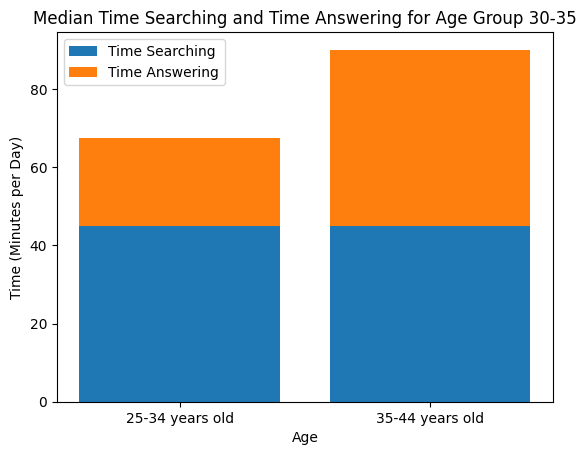

In [63]:
QUERY = "SELECT TimeSearching, TimeAnswering, Age FROM main"
df = pd.read_sql_query(QUERY, conn)

df_filtered = df[df['Age'].isin(['25-34 years old', '35-44 years old'])]

def time_to_numeric(time_range):
    if time_range == 'Less than 15 minutes a day':
        return 7.5
    elif time_range == '15-30 minutes a day':
        return 22.5
    elif time_range == '30-60 minutes a day':
        return 45
    elif time_range == '60-120 minutes a day':
        return 90
    elif time_range == 'Over 120 minutes a day':
        return 150
    else:
        return None

df_filtered['TimeSearching_numeric'] = df_filtered['TimeSearching'].apply(time_to_numeric)
df_filtered['TimeAnswering_numeric'] = df_filtered['TimeAnswering'].apply(time_to_numeric)

df_filtered = df_filtered.dropna(subset=['TimeSearching_numeric', 'TimeAnswering_numeric'])

df_grouped = df_filtered.groupby('Age')[['TimeSearching_numeric', 'TimeAnswering_numeric']].median().reset_index()

plt.bar(
    df_grouped['Age'],
    df_grouped['TimeSearching_numeric'],
    label='Time Searching'
)

plt.bar(
    df_grouped['Age'],
    df_grouped['TimeAnswering_numeric'],
    bottom=df_grouped['TimeSearching_numeric'],
    label='Time Answering'
)

plt.title('Median Time Searching and Time Answering for Age Group 30-35')
plt.xlabel('Age')
plt.ylabel('Time (Minutes per Day)')
plt.legend()
plt.show()

### Visualizing Comparison of Data

**Line Chart**

Plot the median `CompTotal` for all ages from 45 to 60.


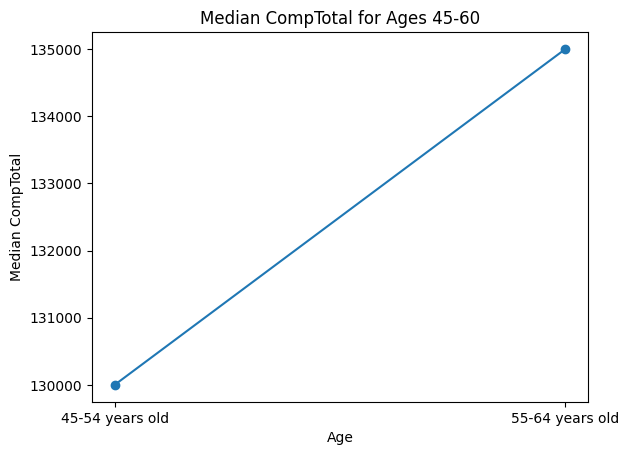

In [69]:
QUERY = "SELECT CompTotal, Age FROM main"
df = pd.read_sql_query(QUERY, conn)

df_filtered = df[df['Age'].isin(['45-54 years old', '55-64 years old'])]

df_grouped = df_filtered.groupby('Age')['CompTotal'].median().reset_index()

plt.plot(df_grouped['Age'], df_grouped['CompTotal'], marker='o')
plt.title('Median CompTotal for Ages 45-60')
plt.xlabel('Age')
plt.ylabel('Median CompTotal')
plt.show()

**Bar Chart**

Create a horizontal bar chart using the `MainBranch` column.


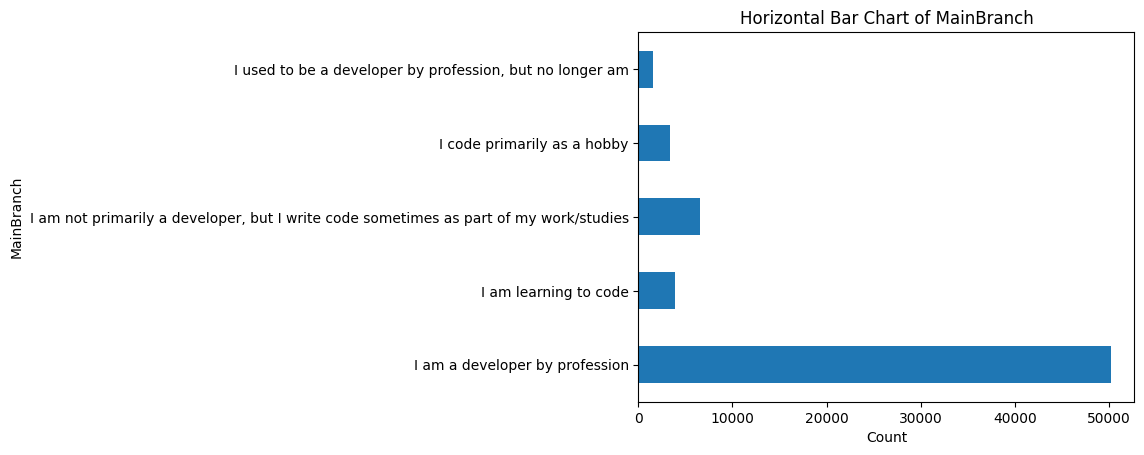

In [70]:
QUERY = "SELECT MainBranch, COUNT(*) as count FROM main GROUP BY MainBranch"
df = pd.read_sql_query(QUERY, conn)
df.plot(kind='barh', x='MainBranch', y='count', legend=False)
plt.title('Horizontal Bar Chart of MainBranch')
plt.xlabel('Count')
plt.ylabel('MainBranch')
plt.show()

### Summary


In this lab, you focused on extracting and visualizing data from an RDBMS using SQL queries and SQLite. You applied various visualization techniques, including:

- Histograms to display the distribution of CompTotal.
- Box plots to show the spread of ages.
- Scatter plots and bubble plots to explore relationships between variables like Age, WorkExp, `TimeSearching` and `TimeAnswering`.
- Pie charts and stacked charts to visualize the composition of data.
- Line charts and bar charts to compare data across categories.


### Close the Database Connection

Once the lab is complete, ensure to close the database connection:


In [71]:
conn.close()

## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
